<a href="https://www.kaggle.com/code/carlosmatos97/housepriceswithgraphs?scriptVersionId=213941105" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/home-data-for-ml-course/sample_submission.csv
/kaggle/input/home-data-for-ml-course/sample_submission.csv.gz
/kaggle/input/home-data-for-ml-course/train.csv.gz
/kaggle/input/home-data-for-ml-course/data_description.txt
/kaggle/input/home-data-for-ml-course/test.csv.gz
/kaggle/input/home-data-for-ml-course/train.csv
/kaggle/input/home-data-for-ml-course/test.csv


In [2]:
import pandas
import numpy
import matplotlib.pyplot as plt
import seaborn
import plotly.express as px
import plotly.graph_objects as go
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [3]:
def percentColumnNullValues(data_set, columns):
    nan_columns = []
    for column in columns:
        if (data_set[column].isnull().sum() / data_set[column].shape[0] )*100 > 0:
            print(column)
            print((data_set[column].isnull().sum() / data_set[column].shape[0] )*100)
            if column not in nan_columns:
                nan_columns.append(column)
    return nan_columns

In [4]:
def nanValues(data_set,missing_values_columns_count):
    total_cels = numpy.product(data_set.shape)
    total_missing = missing_values_columns_count.sum()
    percent_values_missing = (total_missing/total_cels)*100
    print(percent_values_missing)

In [5]:
train_data_directory = '/kaggle/input/home-data-for-ml-course/train.csv'
test_data_directory = '/kaggle/input/home-data-for-ml-course/test.csv'

In [6]:
train_dataset = pandas.read_csv(train_data_directory)
test_dataset = pandas.read_csv(test_data_directory)
train_dataset.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [7]:
ids = test_dataset.Id
ids

0       1461
1       1462
2       1463
3       1464
4       1465
        ... 
1454    2915
1455    2916
1456    2917
1457    2918
1458    2919
Name: Id, Length: 1459, dtype: int64

In [8]:
test_dataset.Id

0       1461
1       1462
2       1463
3       1464
4       1465
        ... 
1454    2915
1455    2916
1456    2917
1457    2918
1458    2919
Name: Id, Length: 1459, dtype: int64

In [9]:
missing_train_values_columns_count = train_dataset.isnull().sum()
nanValues(train_dataset, missing_train_values_columns_count)

6.620158971757145


In [10]:
missing_test_values_columns_count = test_dataset.isnull().sum()
nanValues(test_dataset, missing_test_values_columns_count)

6.749485949280329


In [11]:
print("Train values: ",missing_train_values_columns_count)
print("Test values: ",missing_test_values_columns_count)


Train values:  Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64
Test values:  Id                 0
MSSubClass         0
MSZoning           4
LotFrontage      227
LotArea            0
                ... 
MiscVal            0
MoSold             0
YrSold             0
SaleType           1
SaleCondition      0
Length: 80, dtype: int64


In [12]:
train_dataset_columns = train_dataset.columns
test_dataset_columns = test_dataset.columns
print("\nTrain Dataset\n",train_dataset_columns);
print("\nTest Dataset\n",test_dataset_columns);


Train Dataset
 Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCo

In [13]:
print(train_dataset.dtypes);

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object


In [14]:
train_nan_columns = percentColumnNullValues(train_dataset, train_dataset_columns)
test_nan_columns = percentColumnNullValues(test_dataset, test_dataset_columns)

LotFrontage
17.73972602739726
Alley
93.76712328767123
MasVnrType
59.726027397260275
MasVnrArea
0.547945205479452
BsmtQual
2.5342465753424657
BsmtCond
2.5342465753424657
BsmtExposure
2.6027397260273974
BsmtFinType1
2.5342465753424657
BsmtFinType2
2.6027397260273974
Electrical
0.0684931506849315
FireplaceQu
47.26027397260274
GarageType
5.5479452054794525
GarageYrBlt
5.5479452054794525
GarageFinish
5.5479452054794525
GarageQual
5.5479452054794525
GarageCond
5.5479452054794525
PoolQC
99.52054794520548
Fence
80.75342465753424
MiscFeature
96.30136986301369
MSZoning
0.2741603838245374
LotFrontage
15.558601782042494
Alley
92.66620973269363
Utilities
0.1370801919122687
Exterior1st
0.06854009595613435
Exterior2nd
0.06854009595613435
MasVnrType
61.27484578478409
MasVnrArea
1.0281014393420151
BsmtQual
3.015764222069911
BsmtCond
3.0843043180260454
BsmtExposure
3.015764222069911
BsmtFinType1
2.878684030157642
BsmtFinSF1
0.06854009595613435
BsmtFinType2
2.878684030157642
BsmtFinSF2
0.0685400959561343

In [15]:
#fazer um função para este codigo
for i in range(len(train_nan_columns)):
    fig = px.histogram(train_dataset, x = train_nan_columns[i])
    fig.show()

In [16]:
#fazer um função para este codigo
for i in range(len(test_nan_columns)):
    fig = px.histogram(test_dataset, x = test_nan_columns[i])
    fig.show()

In [17]:
def HousesSplitedByFiveYears(amountHousesPerYear):
    quantity = []
    year = 1900
    for year in range(1900,2021,5):
        amount=(amountHousesPerYear < year).sum()
        quantity.append((year,amount))
    yearAmount = pandas.DataFrame(numpy.array(quantity).reshape(25,2))
    fig = go.Figure([go.Bar(x=yearAmount[0], y = yearAmount[1].values)])
    fig.show()

In [18]:
train_amount_houses_per_year = train_dataset.YearBuilt
train_year_amount = HousesSplitedByFiveYears(train_amount_houses_per_year)

In [19]:
test_amount_houses_per_year = test_dataset.YearBuilt
test_year_amount = HousesSplitedByFiveYears(test_amount_houses_per_year)

In [20]:
for column in train_dataset_columns:
    print("\nThree exemples")
    print(train_dataset[column].head(3))
    print("\nValue counts")
    print(train_dataset[column].value_counts())
    print("\nColumn Description")
    print(train_dataset[column].describe(), end="\n\n")
    print("*"*30)


Three exemples
0    1
1    2
2    3
Name: Id, dtype: int64

Value counts
Id
1       1
982     1
980     1
979     1
978     1
       ..
485     1
484     1
483     1
482     1
1460    1
Name: count, Length: 1460, dtype: int64

Column Description
count    1460.000000
mean      730.500000
std       421.610009
min         1.000000
25%       365.750000
50%       730.500000
75%      1095.250000
max      1460.000000
Name: Id, dtype: float64

******************************

Three exemples
0    60
1    20
2    60
Name: MSSubClass, dtype: int64

Value counts
MSSubClass
20     536
60     299
50     144
120     87
30      69
160     63
70      60
80      58
90      52
190     30
85      20
75      16
45      12
180     10
40       4
Name: count, dtype: int64

Column Description
count    1460.000000
mean       56.897260
std        42.300571
min        20.000000
25%        20.000000
50%        50.000000
75%        70.000000
max       190.000000
Name: MSSubClass, dtype: float64

*******************

In [21]:
train_dataset['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

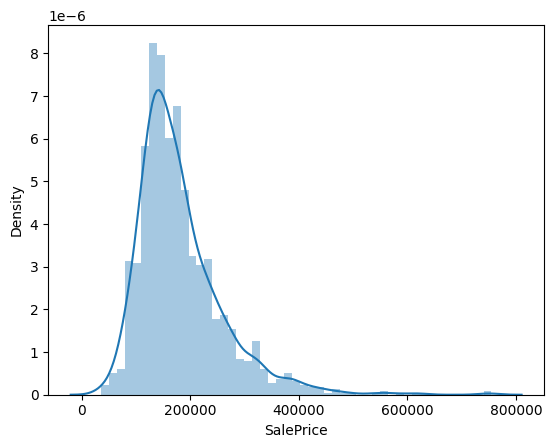

In [22]:
seaborn.distplot(train_dataset['SalePrice']);

In [23]:
print("Skewness: %f" % train_dataset["SalePrice"].skew())
print("Kurtosis: %f" % train_dataset["SalePrice"].kurt())

Skewness: 1.882876
Kurtosis: 6.536282


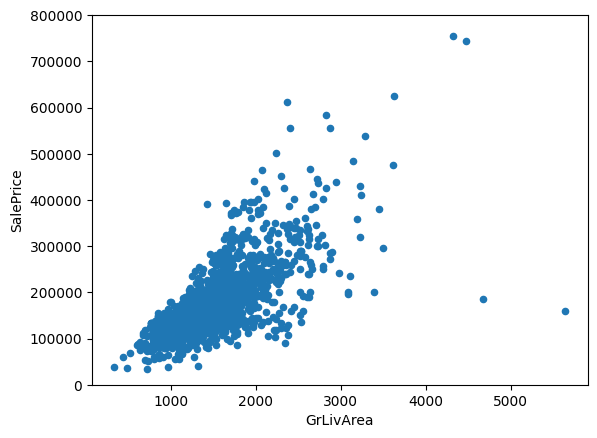

In [24]:
var = "GrLivArea"
data = pandas.concat([train_dataset["SalePrice"], train_dataset[var]], axis = 1)
data.plot.scatter(x = var, y = 'SalePrice', ylim = (0, 800000));

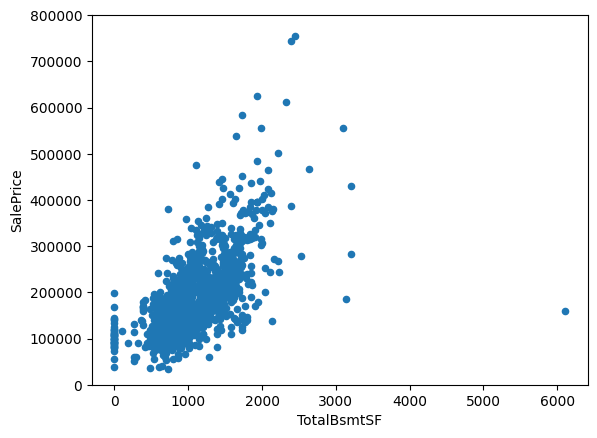

In [25]:
var = "TotalBsmtSF"
data = pandas.concat([train_dataset["SalePrice"], train_dataset[var]], axis = 1)
data.plot.scatter(x = var, y = 'SalePrice', ylim = (0, 800000));

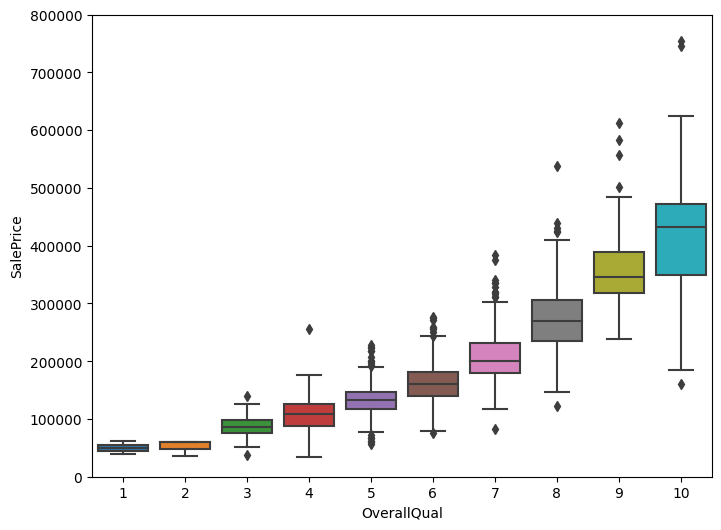

In [26]:
var = "OverallQual"
data = pandas.concat([train_dataset["SalePrice"], train_dataset[var]], axis = 1)
f, ax = plt.subplots(figsize = (8, 6))
fig = seaborn.boxplot(x = var, y = "SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);

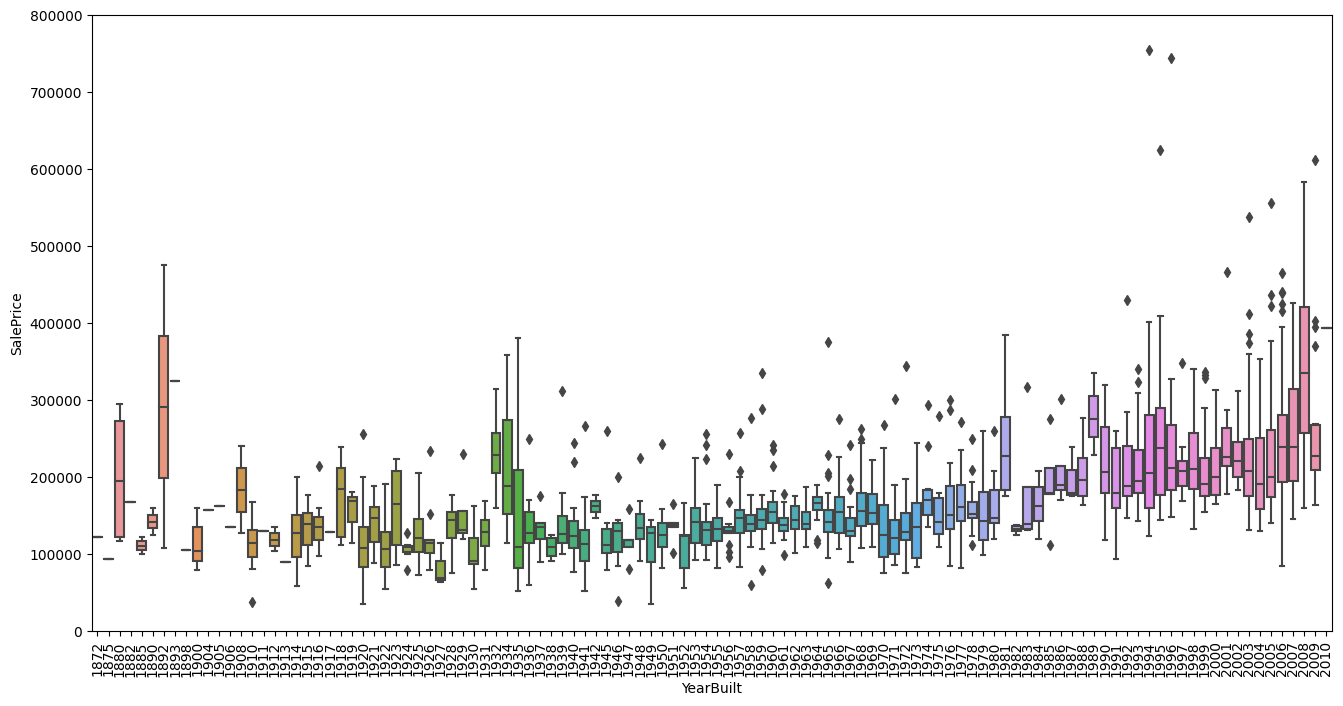

In [27]:
var = "YearBuilt"
data = pandas.concat([train_dataset["SalePrice"], train_dataset[var]], axis = 1)
f, ax = plt.subplots(figsize=(16, 8))
fig = seaborn.boxplot(x = var, y = 'SalePrice', data = data)
fig.axis(ymin = 0, ymax = 800000);
plt.xticks(rotation = 90);

In [28]:
from sklearn.preprocessing import OrdinalEncoder

categorical_columns = train_dataset.select_dtypes(include=['object']).columns
encoder = OrdinalEncoder()
train_dataset[categorical_columns] = encoder.fit_transform(train_dataset[categorical_columns])


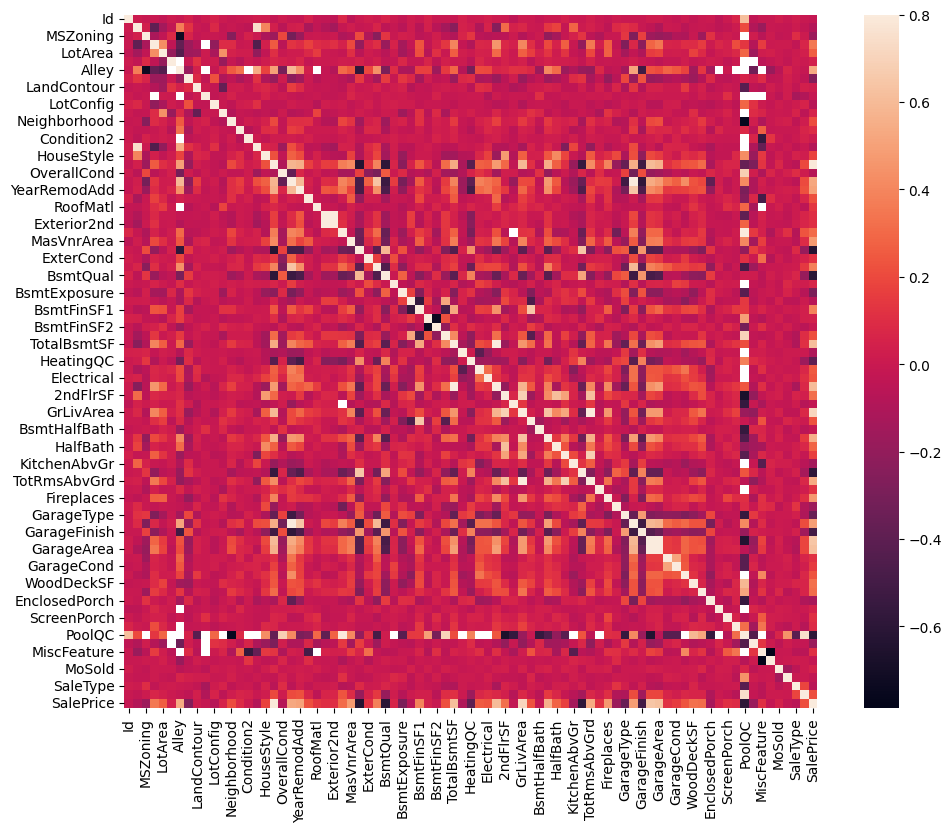

In [29]:
correlation_matrix = train_dataset.corr()
f, ax = plt.subplots(figsize = (12, 9))
seaborn.heatmap(correlation_matrix, vmax = .8, square = True);

Text(0.5, 1.0, "Correlation Heatmap of Variables with 'SalePrice'")

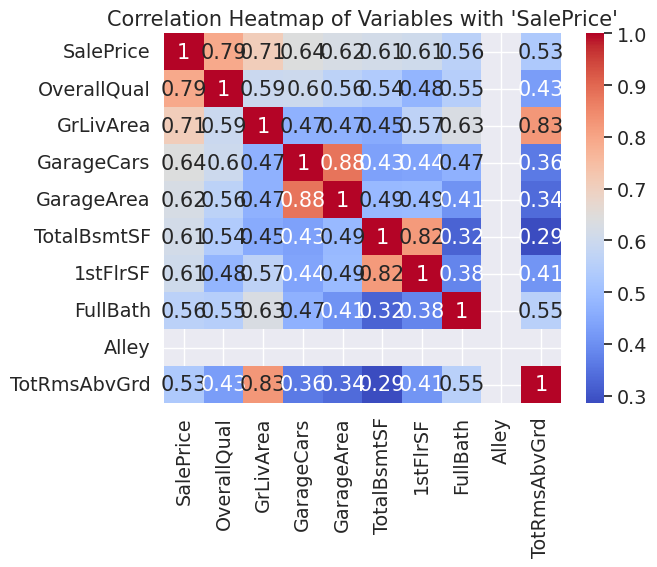

In [30]:
# Assuming 'train_dataset' is your DataFrame
correlation_matrix = train_dataset.corr()

# Now you can get the top 'variables' correlations with "SalePrice"
variables = 10
cols = correlation_matrix.nlargest(variables, "SalePrice")['SalePrice'].index

import numpy as np
import seaborn as sns

# Compute the correlation matrix for the selected columns
salePrice_correlation = np.corrcoef(train_dataset[cols].values.T)

# Create the heatmap
sns.set(font_scale=1.25)
hm = sns.heatmap(salePrice_correlation, cbar=True, annot=True, cmap="coolwarm", xticklabels=cols, yticklabels=cols)

# Display the heatmap
hm.set_title("Correlation Heatmap of Variables with 'SalePrice'")


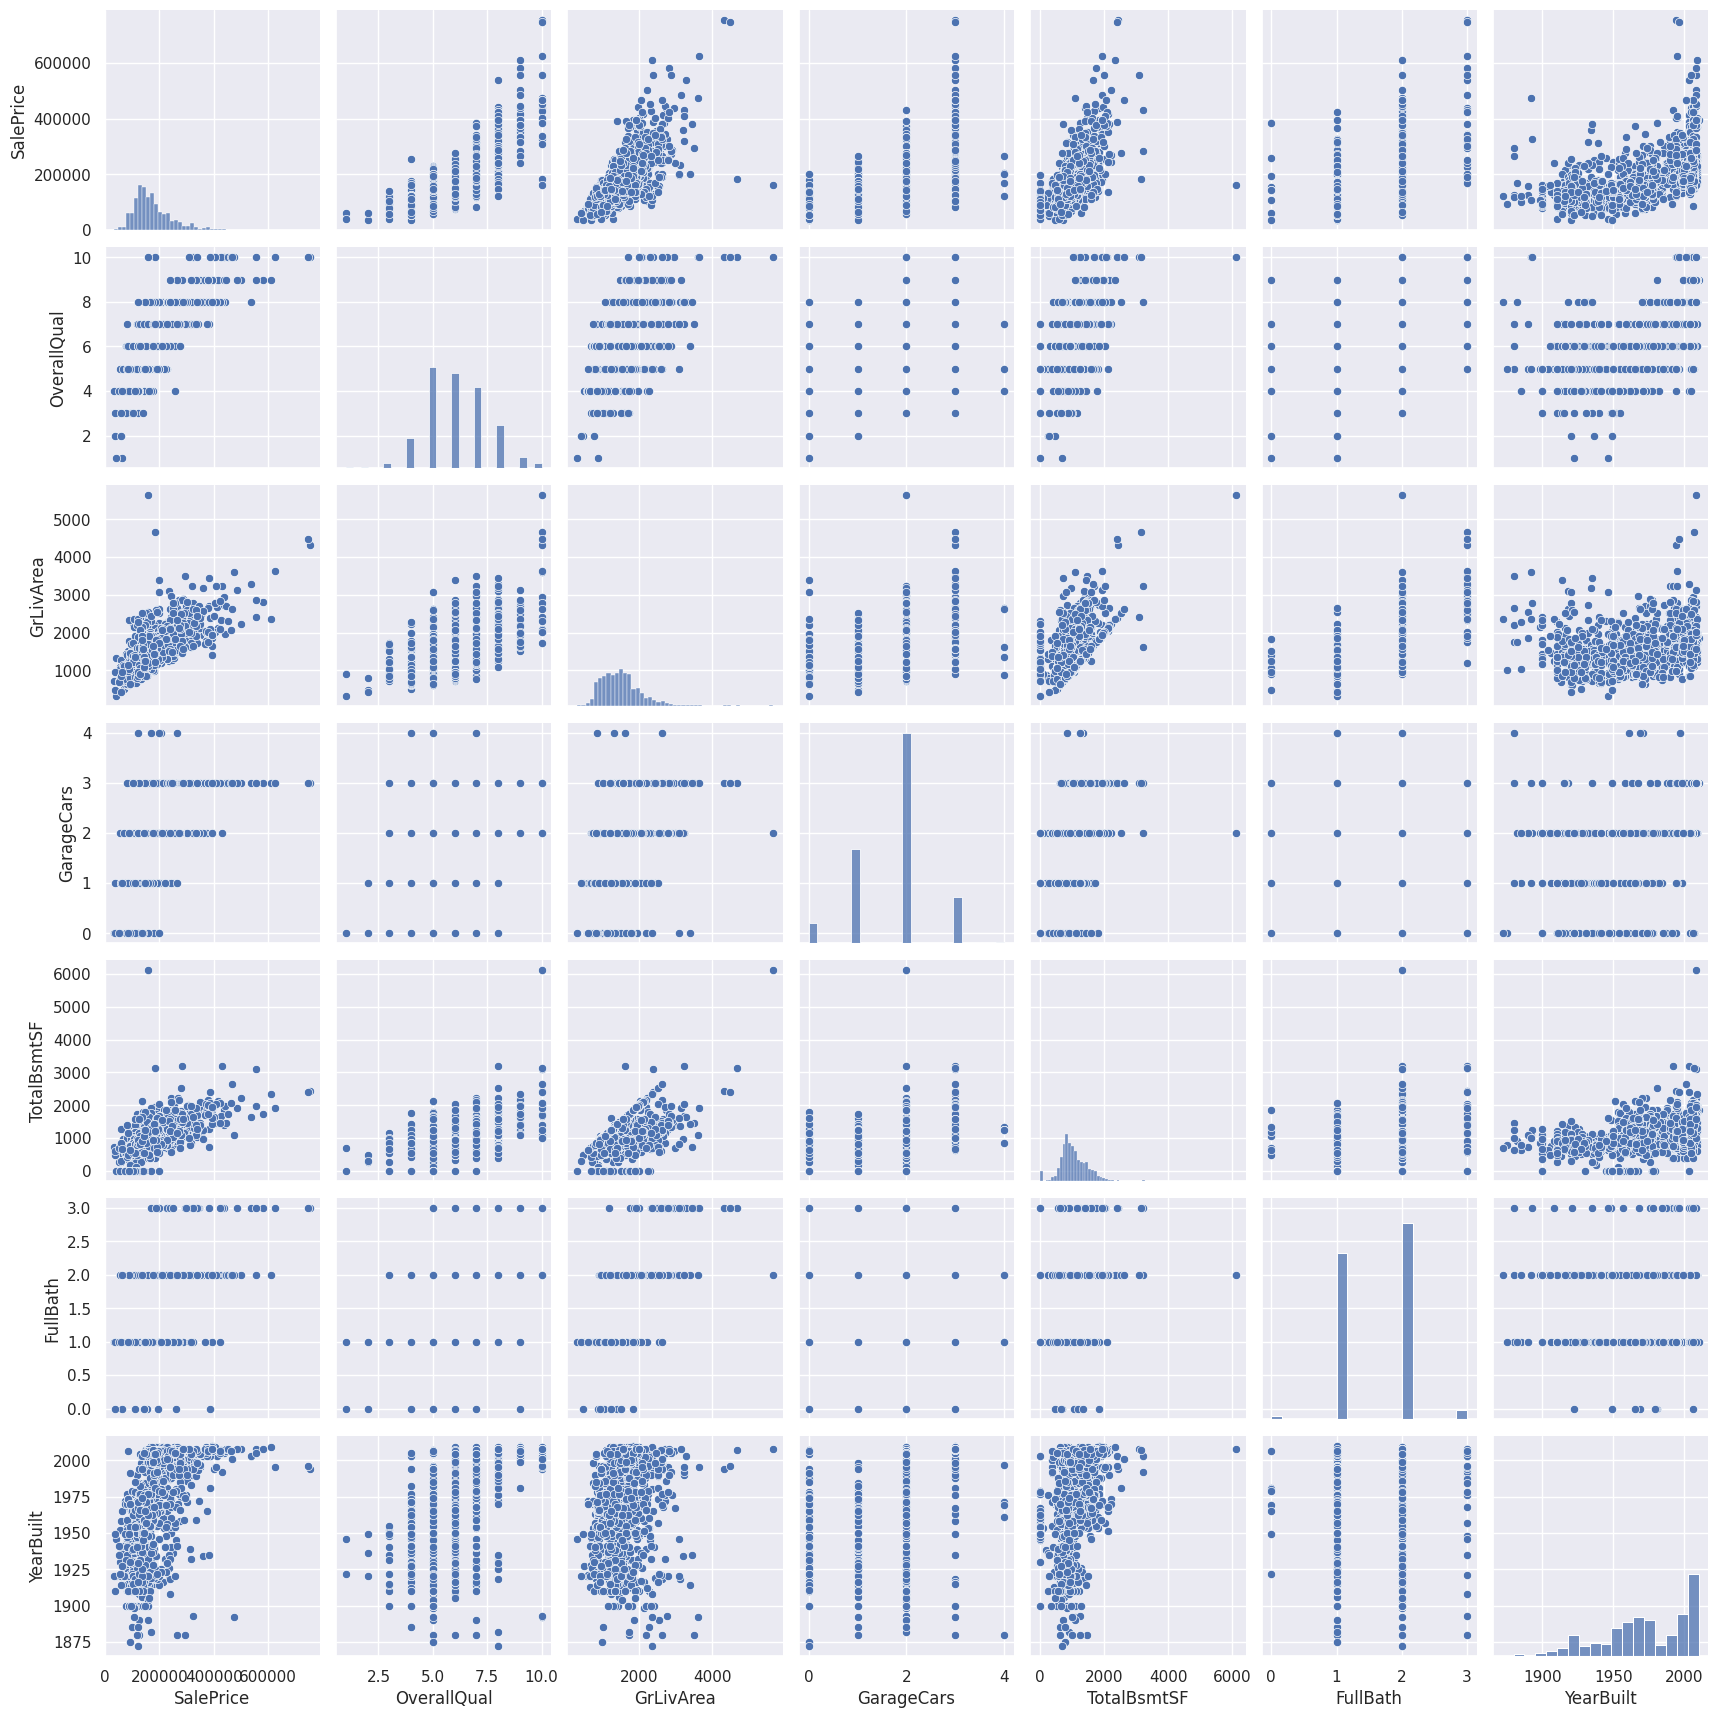

In [31]:
seaborn.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
seaborn.pairplot(train_dataset[cols], size = 2.5)
plt.show();

In [32]:
totaldata = train_dataset.isnull().sum().sort_values(ascending = False)
percent_null = (train_dataset.isnull().sum()/train_dataset.isnull().count()).sort_values(ascending = False)
missing_data = pandas.concat([totaldata, percent_null], axis = 1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
MasVnrType,872,0.597260
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageYrBlt,81,0.055479
GarageCond,81,0.055479
GarageType,81,0.055479


In [33]:
len(missing_data)

81

In [34]:
totaldata = train_dataset.isnull().sum().sort_values(ascending = False)
percent_null = (train_dataset.isnull().sum()/train_dataset.isnull().count()).sort_values(ascending = False)
missing_data = pandas.concat([totaldata, percent_null], axis = 1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
MasVnrType,872,0.597260
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageYrBlt,81,0.055479
GarageCond,81,0.055479
GarageType,81,0.055479


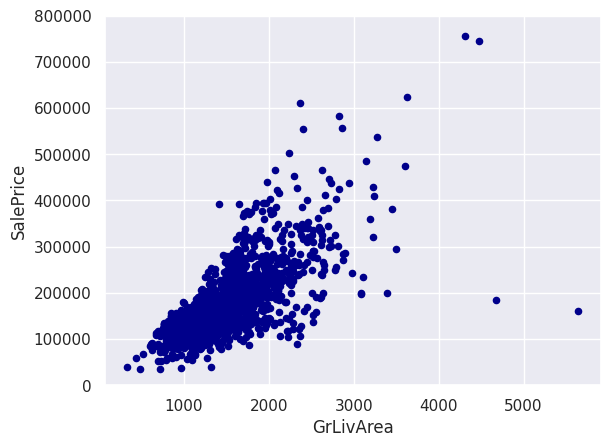

In [35]:
var = 'GrLivArea'
data = pandas.concat([train_dataset['SalePrice'], train_dataset[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000), c = 'DarkBlue');

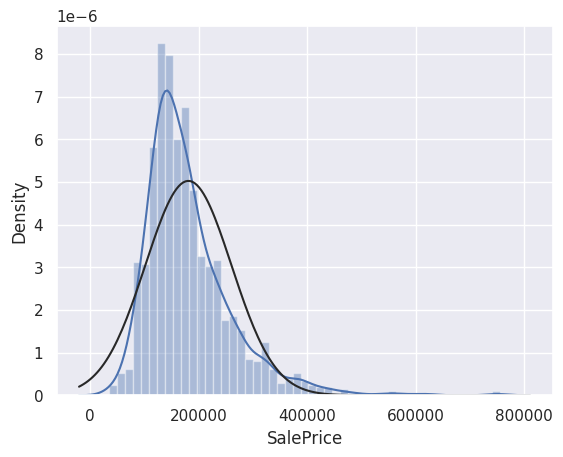

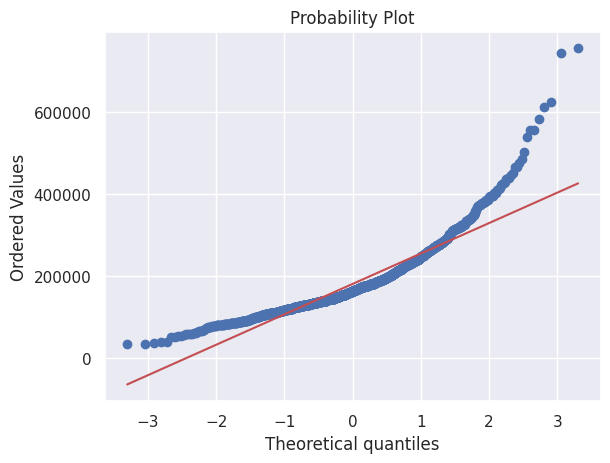

In [36]:
seaborn.distplot(train_dataset['SalePrice'], fit=norm);
fig = plt.figure()
res = stats.probplot(train_dataset['SalePrice'], plot=plt)

In [37]:
#Log transformation
train_dataset["SalePrice"] = numpy.log(train_dataset['SalePrice'])

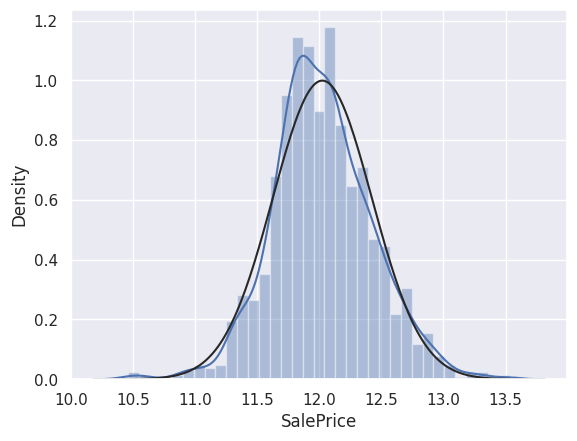

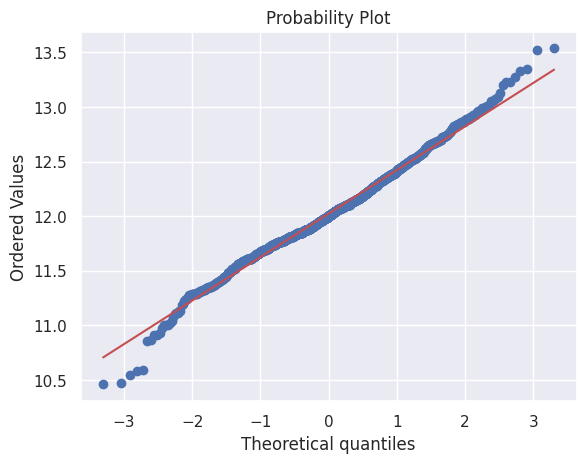

In [38]:
#transformed histogram and normal probability plot
seaborn.distplot(train_dataset['SalePrice'], fit=norm);
fig = plt.figure()
res = stats.probplot(train_dataset['SalePrice'], plot=plt)

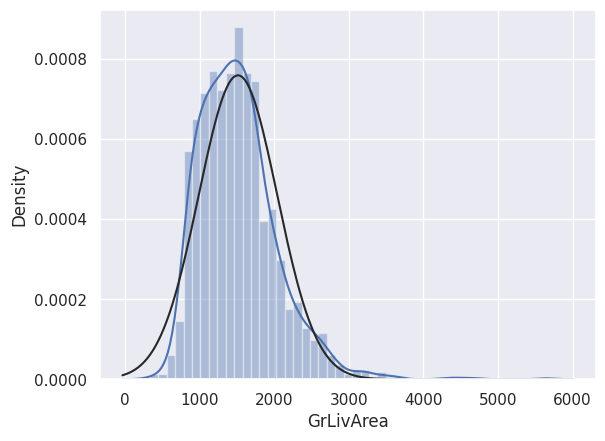

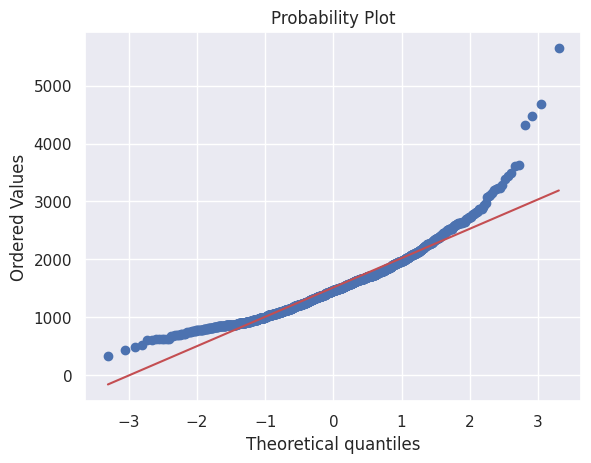

In [39]:
seaborn.distplot(train_dataset['GrLivArea'], fit=norm);
fig = plt.figure()
res = stats.probplot(train_dataset['GrLivArea'], plot=plt)

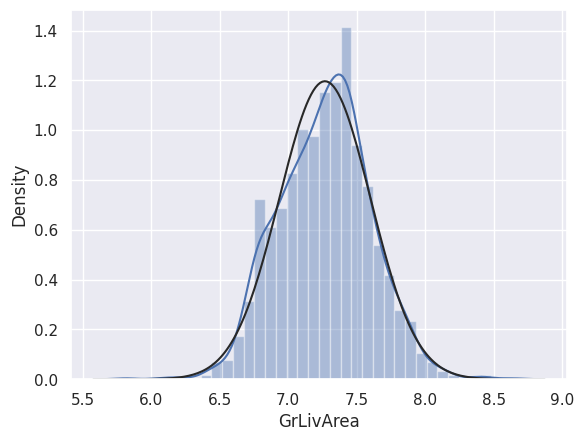

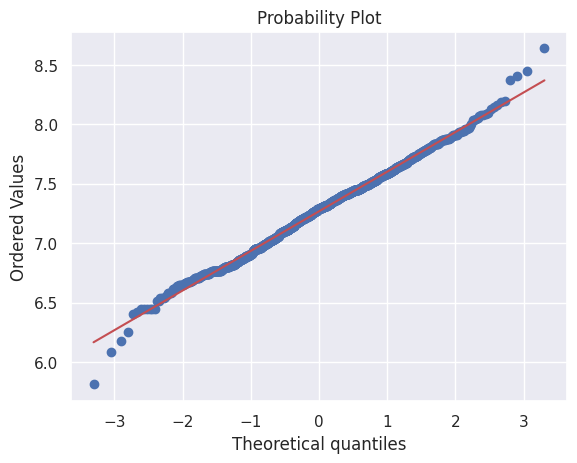

In [40]:
train_dataset['GrLivArea'] = numpy.log(train_dataset['GrLivArea'])
#transformed histogram and normal probability plot
seaborn.distplot(train_dataset['GrLivArea'], fit=norm);
fig = plt.figure()
res = stats.probplot(train_dataset['GrLivArea'], plot=plt)

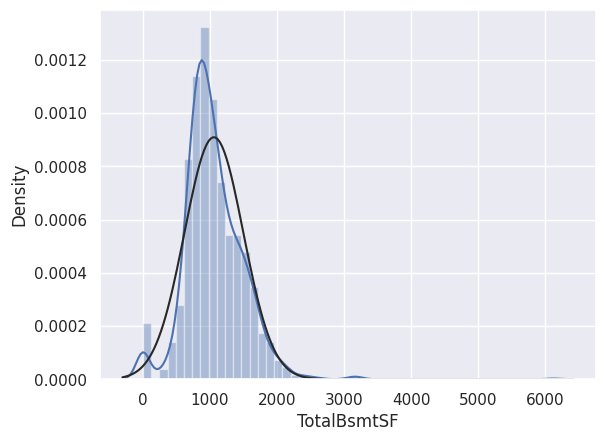

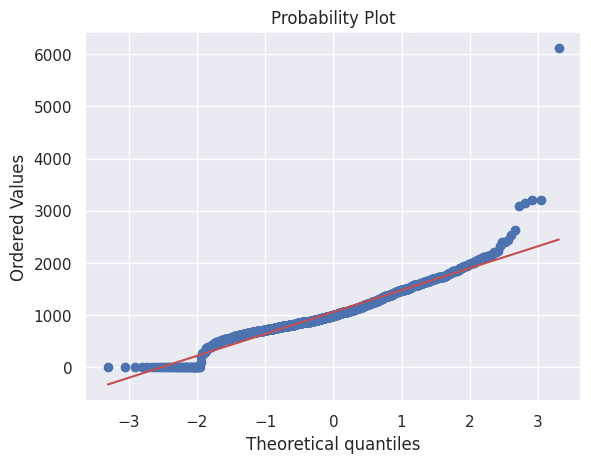

In [41]:
seaborn.distplot(train_dataset['TotalBsmtSF'], fit=norm);
fig = plt.figure()
res = stats.probplot(train_dataset['TotalBsmtSF'], plot=plt)

In [42]:
#create column for new variable (one is enough because it's a binary categorical feature)
#if area>0 it gets 1, for area==0 it gets 0
train_dataset['HasBsmt'] = pandas.Series(len(train_dataset['TotalBsmtSF']), index=train_dataset.index)
train_dataset['HasBsmt'] = 0 
train_dataset.loc[train_dataset['TotalBsmtSF']>0,'HasBsmt'] = 1

In [43]:
train_dataset.loc[train_dataset['HasBsmt']==1,'TotalBsmtSF'] = numpy.log(train_dataset['TotalBsmtSF'])

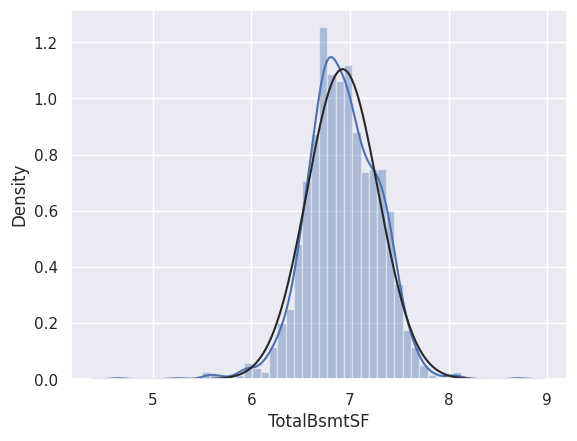

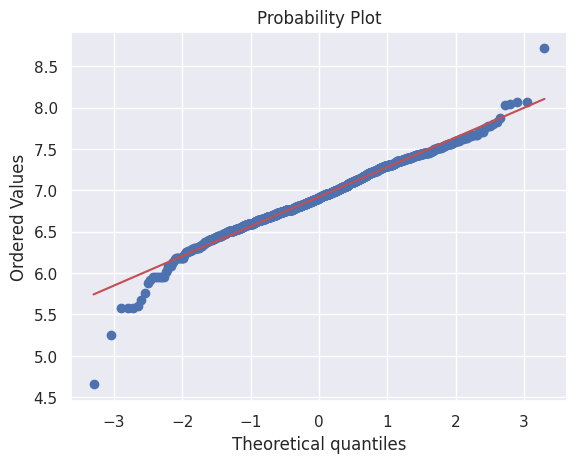

In [44]:
#histogram and normal probability plot
seaborn.distplot(train_dataset[train_dataset['TotalBsmtSF']>0]['TotalBsmtSF'], fit=norm);
fig = plt.figure()
res = stats.probplot(train_dataset[train_dataset['TotalBsmtSF']>0]['TotalBsmtSF'], plot=plt)

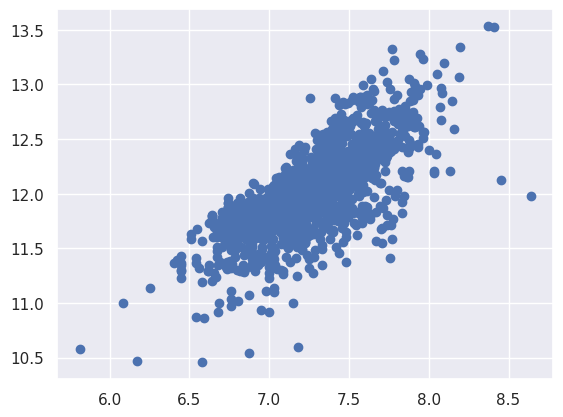

In [45]:
#scatter plot
plt.scatter(train_dataset['GrLivArea'], train_dataset['SalePrice']);

In [46]:
from sklearn.ensemble import GradientBoostingRegressor
model_GBR =  GradientBoostingRegressor(n_estimators=1100, loss='squared_error', subsample = 0.35, learning_rate = 0.001,random_state=1)


In [47]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

def tratar_normalizar_dados(df):
    # Copia os dados para evitar modificacoes indesejadas no original
    df = df.copy()

    # Preenche valores nulos para colunas numéricas com a média
    for col in df.select_dtypes(include=['number']).columns:
        df[col] = df[col].fillna(df[col].mean())

    # Preenche valores ausentes para colunas categóricas com a moda
    for col in df.select_dtypes(include=['object']).columns:
        df[col] = df[col].fillna(df[col].mode()[0])

    # Normaliza os dados numéricos para o intervalo [0, 1]
    scaler = MinMaxScaler()
    cols_numericas = df.select_dtypes(include=['number']).columns
    df[cols_numericas] = scaler.fit_transform(df[cols_numericas])

    return df

def atribuir_zero_nan(df):
    # Substitui todos os valores NaN por 0
    return df.fillna(0)

def ajustar_variaveis_categoricas(df):
    # Converte variáveis categóricas em variáveis dummy
    return pd.get_dummies(df, drop_first=True)

def alinhar_colunas(df1, df2):
    # Obtém todas as colunas únicas dos dois DataFrames
    todas_colunas = list(set(df1.columns).union(set(df2.columns)))

    # Adiciona as colunas que faltam em cada DataFrame com valores 0
    for col in todas_colunas:
        if col not in df1.columns:
            df1[col] = 0
        if col not in df2.columns:
            df2[col] = 0

    # Reordena as colunas para que fiquem na mesma ordem
    df1 = df1[todas_colunas]
    df2 = df2[todas_colunas]

    return df1, df2


train_dataset = tratar_normalizar_dados(train_dataset)
train_dataset = atribuir_zero_nan(train_dataset)
train_dataset = ajustar_variaveis_categoricas(train_dataset)

test_dataset = tratar_normalizar_dados(test_dataset)
test_dataset = atribuir_zero_nan(test_dataset)
test_dataset = ajustar_variaveis_categoricas(test_dataset)

train_dataset, test_dataset = alinhar_colunas(train_dataset, test_dataset)

X_train = tratar_normalizar_dados(train_dataset)
X_test = tratar_normalizar_dados(test_dataset)
print(X_test)

X_train = X_train.applymap(lambda x: int(x) if isinstance(x, bool) else x)
X_test = X_test.applymap(lambda x: int(x) if isinstance(x, bool) else x)


      BsmtFinType1_GLQ  Heating_Wall  Exterior2nd_Brk Cmn  MasVnrArea  \
0                False         False                False    0.000000   
1                False         False                False    0.083721   
2                 True         False                False    0.000000   
3                 True         False                False    0.015504   
4                False         False                False    0.000000   
...                ...           ...                  ...         ...   
1454             False         False                False    0.000000   
1455             False         False                False    0.000000   
1456             False         False                False    0.000000   
1457              True         False                False    0.000000   
1458             False         False                False    0.072868   

      Neighborhood_NPkVill  Functional_Min2  Condition1_PosN  \
0                    False            False            Fals

In [48]:
print(X_test)


      BsmtFinType1_GLQ  Heating_Wall  Exterior2nd_Brk Cmn  MasVnrArea  \
0                    0             0                    0    0.000000   
1                    0             0                    0    0.083721   
2                    1             0                    0    0.000000   
3                    1             0                    0    0.015504   
4                    0             0                    0    0.000000   
...                ...           ...                  ...         ...   
1454                 0             0                    0    0.000000   
1455                 0             0                    0    0.000000   
1456                 0             0                    0    0.000000   
1457                 1             0                    0    0.000000   
1458                 0             0                    0    0.072868   

      Neighborhood_NPkVill  Functional_Min2  Condition1_PosN  \
0                        0                0                

In [49]:
y_train = X_train.SalePrice
X_train = X_train.drop(['Id','SalePrice'],axis=1)

In [50]:
X_test = X_test.drop(['Id','SalePrice'],axis=1)

In [51]:
def atribuirZeroNan(df):
    # Substitui todos os valores NaN por 0
    return df.fillna(0)
X_train = atribuirZeroNan(X_train)
X_test = atribuirZeroNan(X_test)

model_GBR.fit(X_train, y_train)

GradientBoostingRegressor(learning_rate=0.001, n_estimators=1100,
                          random_state=1, subsample=0.35)

In [52]:
preds_GBR = model_GBR.predict(X_test)

In [53]:
predictions=np.exp(preds_GBR)
submission= pd.DataFrame({'Id': ids,'SalePrice': predictions})